In [1]:
import numpy as np
from functions.propagators import CR3BP
import scipy as sp
from functions.read_ICs import read_ICs
from functions.density_funcs import (
    alt_density_1d,
    integrate_cdf,
    planar_jacobi_points,
    alt_density_1d_meshgrid,
)
from functions.plot_trajectories import plot_trajectories

# from scipy import integrate

ids = [25, 100, 150, 200, 400, 600]
tf, DRO_ICs = read_ICs("data/ICs_DRO.csv", ids)
base_propagator = CR3BP(LU=389703, TU=382981)

inertial_states = []
CR3BP_states = []
times = []
for idx in range(len(ids)):
    base_propagator.propagate(DRO_ICs[idx, :], tf[idx])
    base_propagator.get_inertial_states()
    inertial_states.append(base_propagator.states)
    CR3BP_states.append(base_propagator.states_cr3bp)
    times.append(base_propagator.ts)

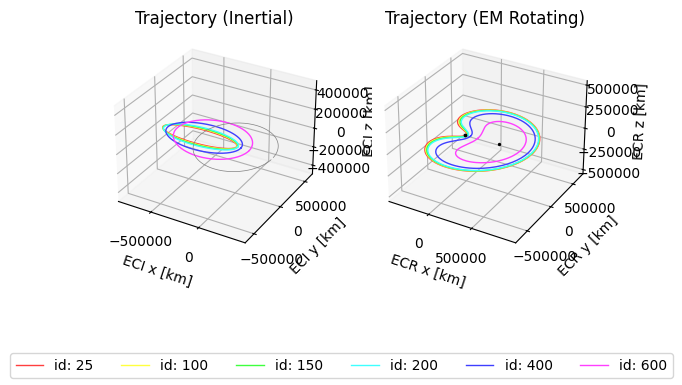

In [2]:
plot_trajectories(
    inertial_states,
    CR3BP_states,
    base_propagator.moonstate,
    [
        (1 - base_propagator.mu) * base_propagator.LU,
        (-base_propagator.mu) * base_propagator.LU,
    ],
    ids,
)

In [3]:
ps, alts, cdf, xcdf = alt_density_1d(
    CR3BP_states[2],
    times[2],
    tf[2] * base_propagator.TU,
    (-base_propagator.mu) * base_propagator.LU,
)

In [4]:
JCpoints = planar_jacobi_points(3.2, base_propagator)

In [5]:
psmesh, altsmesh, cdfmesh, xcdfmesh = alt_density_1d_meshgrid(
    JCpoints, ( - base_propagator.mu) * base_propagator.LU, xcdf
)

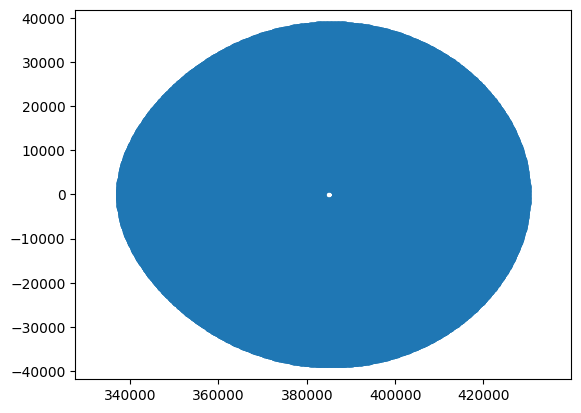

In [6]:
import matplotlib.pyplot as plt
plt.scatter(JCpoints[:,0], JCpoints[:,1])
plt.axis("equal")
plt.show()

In [7]:
integrate_cdf(cdf, psmesh)

np.float64(8.635873889134167e-07)